In [ ]:
!pip install tensorflow-text

In [22]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_text
import pandas as pd
import numpy as np

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [24]:
RESOURCES_PATH = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'resources')
RANDOM_STATE = 23923

In [25]:
data = pd.read_csv(os.path.join(RESOURCES_PATH, 'all_train.csv'))
data.head()

,Text,Score,FinalScore1,Category
0,Оригинал взят у в Заложен пятый фрегат проекта...,"[1, 0, 0]",0,Post
1,Бодхисаттва устранения всяческой ущербности (С...,[0],0,Post
2,Выпущено два минометных снаряда. Несколько мин...,[-1],-1,Post
3,В пригороде Дамаска Джобар во время преследова...,[0],0,Post
4,Тема пенсионных реформ оказалась настолько жив...,"[0, 0, 0]",0,Post


In [26]:
data = data.drop(columns=['Score', 'Category'])
data.head()

,Text,FinalScore1
0,Оригинал взят у в Заложен пятый фрегат проекта...,0
1,Бодхисаттва устранения всяческой ущербности (С...,0
2,Выпущено два минометных снаряда. Несколько мин...,-1
3,В пригороде Дамаска Джобар во время преследова...,0
4,Тема пенсионных реформ оказалась настолько жив...,0


In [27]:
plt.rcParams['figure.figsize'] = (20, 20)

In [28]:
def plot_loss(history):
  plt.clf()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validtion loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()

In [29]:
texts, labels = data['Text'].to_numpy(), data['FinalScore1'].to_numpy() + 1

In [30]:
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)
# texts_train, texts_val, labels_train, labels_val = train_test_split(texts_train, labels_train, test_size=0.25, random_state=RANDOM_STATE, shuffle=True)

In [31]:
def train_model(X_train, y_train, n_epoches=1000, lr=1e-3, trainable=False):
    model = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'
    hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=trainable)

    m = keras.Sequential([
        hub_layer,
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])
    m.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr))
    m.summary()
    history = m.fit(X_train, y_train, validation_split=0.2, verbose=1, 
                    epochs=n_epoches)
    plot_loss(history)
    return m

In [18]:
m1 = train_model(texts_train, labels_train, n_epoches=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 512)               68927232  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 1539      
Total params: 69,978,883
Trainable params: 1,051,651
Non-trainable params: 68,927,232
_________________________________________________________________
Epoch 1/10
589/589 [==============================] - 652s 1s/step - loss: 0.8005 - val_loss: 0.7873
Epoch 2/10
589/589 [==============================] - 645s 1s/step - loss: 0.7257 - val_loss: 0.7836
Epoch 3/10
589/589 [==========

KeyboardInterrupt: ignored

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 512)               68927232  
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 1539      
Total params: 69,978,883
Trainable params: 1,051,651
Non-trainable params: 68,927,232
_________________________________________________________________
Epoch 1/2


589/589 [==============================] - 648s 1s/step - loss: 0.8081 - val_loss: 0.7856
Epoch 2/2
589/589 [==============================] - 640s 1s/step - loss: 0.7273 - val_loss: 0.7729


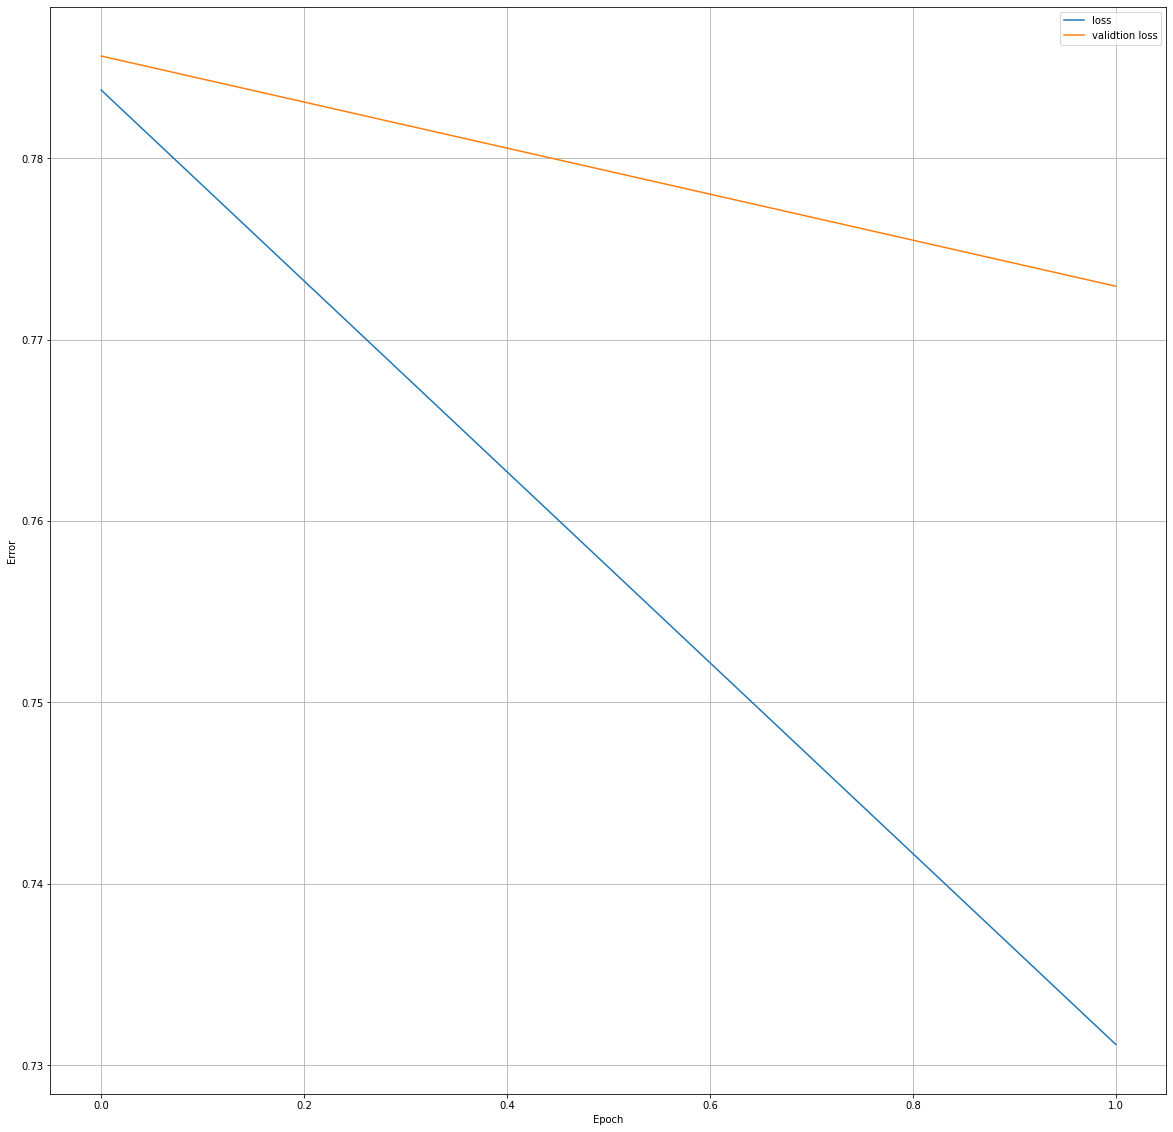

In [19]:
non_overfitted_model = train_model(texts_train, labels_train, n_epoches=2)

In [33]:
predictions = m1.predict(texts_test)

In [41]:
predicted_labels = np.argmax(predictions, axis=1) - 1

In [42]:
predicted_labels.shape

(5889,)

In [43]:
f1_score(labels_test, predicted_labels, average='macro')

0.22539432767599568